1. Import the necessary libraries

In [104]:
from scipy import stats 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro, wilcoxon,chisquare,chi2_contingency,f_oneway
from statsmodels.stats.power import ttest_power

2. Read the data as a data frame

In [2]:
Insurance = pd.read_csv("C:\\Ishan\\Greatlearning\\Labs\\2. 4 Aug\\insurance.csv")
Insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


3. Perform basic EDA which should include the following and print out your insights at every step.

In [3]:
## a. Shape of the data
print(Insurance.shape)

(1338, 7)


In [4]:
## b. Data type of each attribute
print(Insurance.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [5]:
## c. Checking the presence of missing values
Insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
## d. 5 point summary of numerical attributes
print(Insurance.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


bmi Distribution AxesSubplot(0.125,0.125;0.775x0.755)


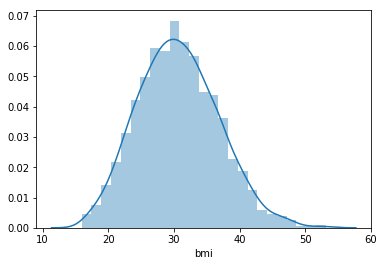

In [7]:
## e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
print("bmi Distribution",sns.distplot(Insurance["bmi"], kde=True))

age Distribution AxesSubplot(0.125,0.125;0.775x0.755)


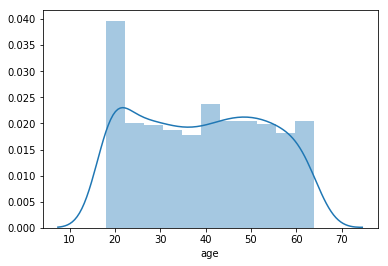

In [8]:
print("age Distribution",sns.distplot(Insurance["age"], kde=True))

charges Distribution AxesSubplot(0.125,0.125;0.775x0.755)


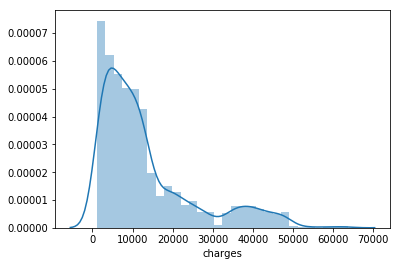

In [9]:
print("charges Distribution",sns.distplot(Insurance["charges"], kde=True))

In [10]:
## f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
print("Skewness of BMI is ",Insurance["bmi"].skew(axis = 0, skipna = True)) 
print("Skewness of Age is ",Insurance["age"].skew(axis = 0, skipna = True)) 
print("Skewness of Charges is ",Insurance["charges"].skew(axis = 0, skipna = True)) 

Skewness of BMI is  0.2840471105987448
Skewness of Age is  0.05567251565299186
Skewness of Charges is  1.5158796580240388


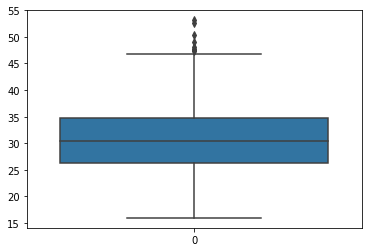

In [11]:
## g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
sns.boxplot(data=Insurance["bmi"])

In above plot we can easily see, outliers are present in bmi column. Data point above 48 is outliers.

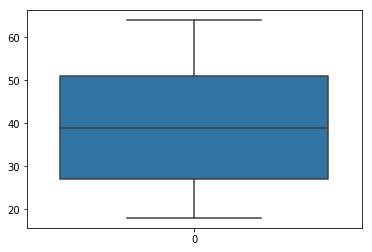

In [12]:
sns.boxplot(data=Insurance["age"])

age doesnot have any outliers.

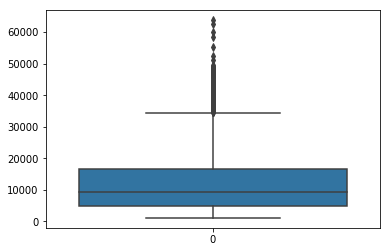

In [13]:
sns.boxplot(data=Insurance["charges"])

Chagers has lot of outliers above 3500 mark.

Sex column Distribution AxesSubplot(0.125,0.125;0.775x0.755)


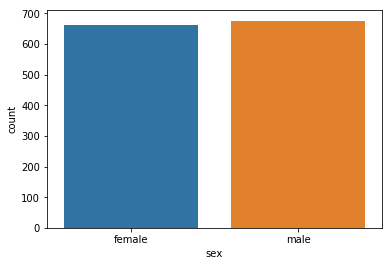

In [19]:
## h. Distribution of categorical columns (include children)
print("Sex column Distribution",sns.countplot(x='sex',data=Insurance))

children column Distribution AxesSubplot(0.125,0.125;0.775x0.755)


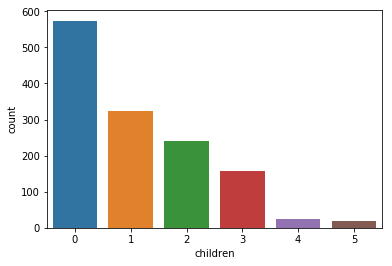

In [20]:
print("children column Distribution",sns.countplot(x='children',data=Insurance))

Smoker column Distribution AxesSubplot(0.125,0.125;0.775x0.755)


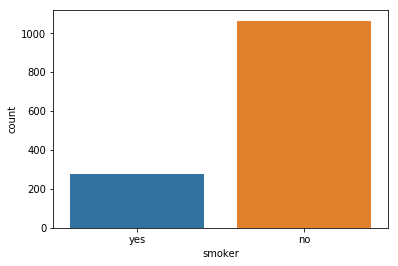

In [21]:
print("Smoker column Distribution",sns.countplot(x='smoker',data=Insurance))

Region column Distribution AxesSubplot(0.125,0.125;0.775x0.755)


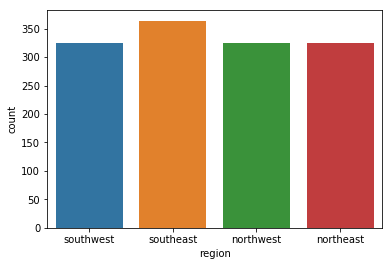

In [22]:
print("Region column Distribution",sns.countplot(x='region',data=Insurance))

In [29]:
## Pair plot that includes all the columns of the data frame

## Converting categorial column to integer
Insurance_new = Insurance
Insurance_new.head()
for col_name in Insurance_new.columns:
    if(Insurance_new[col_name].dtype == 'object'):
        Insurance_new[col_name]= Insurance_new[col_name].astype('category')
        Insurance_new[col_name] = Insurance_new[col_name].cat.codes
Insurance_new.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


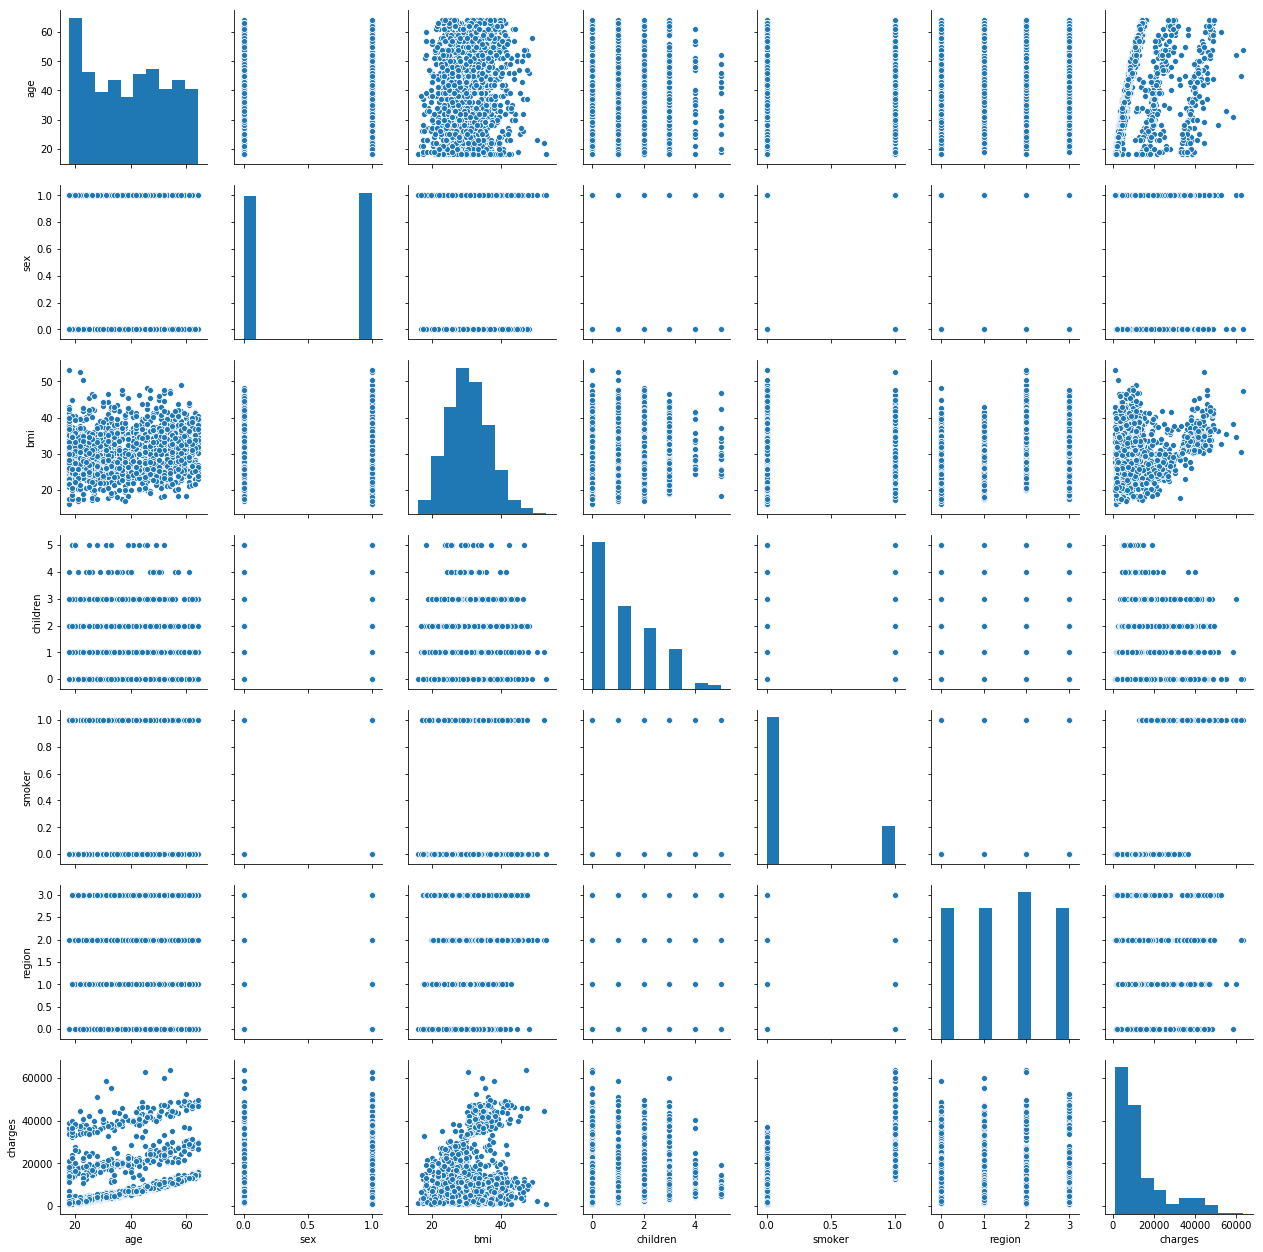

In [31]:
## Creating pair plots for all the columns
sns.pairplot(Insurance_new)

4. Answer the following questions with statistical evidence

In [117]:
## a. Do charges of people who smoke differ significantly from the people who don't?

# creating 2 groups for Somokers and Nonsmokers
nonsmokers=Insurance_new[(Insurance_new.smoker==0)].filter(items=['charges']).to_numpy()
smokers=Insurance_new[(Insurance_new.smoker==1)].filter(items=['charges']).to_numpy()
# Two sample test -- we are assuming there is normal distribution of sample
t_statistic_a, p_value_a = ttest_ind(nonsmokers, smokers)
print("two-sample t-test t-Statistic=",t_statistic_a)
print ("two-sample t-test p-value=", p_value_a)
if(p_value_a<0.05):
    print("we can easily say Smokers pay more than non smokers for there medical bills.")
else:
    print("There is no difference between the medical charges between non smokers and smokers.")

two-sample t-test t-Statistic= [-46.66492117]
two-sample t-test p-value= [8.27143584e-283]
we can easily say Smokers pay more than non smokers for there medical bills.


In [66]:
## One more way to find the evidence without Statistic
Insurance_new['charges'].corr(Insurance_new['smoker'])

0.7872514304984772

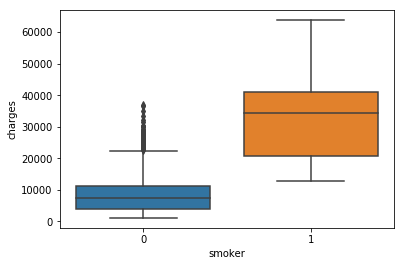

In [35]:
sns.boxplot(x="smoker", y="charges", data=Insurance_new)

After checking the boxplot and correlation (which is very positive), we can easily say Smokers pay more than non smokers for there medical bills.

In [118]:
## b. Does bmi of males differ significantly from that of females?

# creating 2 groups for male and female
male=Insurance_new[(Insurance_new.sex==1)].filter(items=['bmi']).to_numpy()
female=Insurance_new[(Insurance_new.sex==0)].filter(items=['bmi']).to_numpy()
# Two sample test -- we are assuming there is normal distribution of sample
t_statistic_b, p_value_b= ttest_ind(male, female)
print("two-sample t-test t-Statistic=",t_statistic_b)
print ("two-sample t-test p-value=", p_value_b)
if(p_value_b<0.05):
    print("we can easily say BMI has signifact difference between males and female")
else:
    print("we can easily say BMI has no signifact difference between males and female")

two-sample t-test t-Statistic= [1.69675264]
two-sample t-test p-value= [0.08997637]
we can easily say BMI has no signifact difference between males and female


In [36]:
## Another way to answer this question
Insurance_new['bmi'].corr(Insurance_new['sex'])

0.04637115064629453

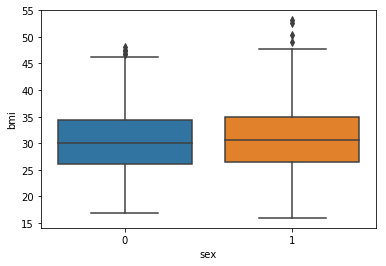

In [37]:
sns.boxplot(x="sex", y="bmi", data=Insurance_new)

After checking the boxplot and correlation (which is positive but not very correlated). So we can say that NO bmi of males differ significantly from that of females.

In [111]:
## c. Is the proportion of smokers significantly different in different genders?

## Chi Square Test Test between 2 categorical variables
# Creating contingency table
cont = pd.crosstab(Insurance_new['smoker'],
                   Insurance_new['sex'])
chi2_contingency(cont)

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 537.56651719],
        [135.56651719, 138.43348281]]))

In [121]:
chi2,p_value_c,dof,arry = chi2_contingency(cont)
print("p_value= ",p_value_c)
if(p_value_c<0.05):
    print("we conclude that the Smoker and Genders variables are dependent")
else:
    print("we conclude that the Smoker and Genders variables are not dependent")

p_value=  0.006548143503580696
we conclude that the Smoker and Genders variables are dependent


In [169]:
## d. Is the distribution of bmi across women with no children, one child and two children, the same ?

# creating 3 groups for with no children, one child and two children
nochildren=Insurance_new[(Insurance_new.sex==0)&(Insurance_new.children==0)].filter(items=['bmi']).to_numpy().flatten() 
onechildren=Insurance_new[(Insurance_new.sex==0)&(Insurance_new.children==1)].filter(items=['bmi']).to_numpy().flatten() 
twochildren=Insurance_new[(Insurance_new.sex==0)&(Insurance_new.children==2)].filter(items=['bmi']).to_numpy().flatten() 

# Performing shapiro and levenes test to confirm assumptions of Normality & Equal Variances

# Shapiro Test
# Null Hypothesis - Data is normally distributed
# Alternate Hypothesis - Data is not normally distributed
wno,p_value_nochild = shapiro(nochildren)
if(p_value_nochild<0.05):
    print("hence nochildren data is not normal")
else:
    print("hence no children data is normal")

hence nochildren data is not normal


In [170]:
wone,p_value_onechild = shapiro(onechildren)
if(p_value_onechild<0.05):
    print("hence One children data is not normal")
else:
    print("hence one children data is normal")

hence one children data is normal


In [171]:
wtwo,p_value_twochild = shapiro(twochildren)
if(p_value_twochild<0.05):
    print("hence two children data is not normal")
else:
    print("hence two children data is normal")

hence two children data is normal


In [174]:
# Levene's Test

# H0: All variances are equal
# Ha: Atleast one of the variances not equal
stat,p_value_levene = levene(nochildren,onechildren,twochildren)
if(p_value_levene<0.05):
    print("hence all variances are equal")
else:
    print("hence all variances are not equal")

hence all variances are not equal


In [177]:
f, p = f_oneway(nochildren,onechildren,twochildren)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p, '\n')
if(p<0.05):
    print("we say that atleast one of the means is significantly different and bmi is same")
else:
    print("we say that atleast one of the means is not significantly different and bmi is not same")

One-way ANOVA
F value: 0.3344720147757968
P value: 0.7158579926754841 

we say that atleast one of the means is not significantly different and bmi is not same
